# Новые тренды зимы

# Загрузка данных и вывод первых 5 строк

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_csv = pd.read_csv('Winter_Fashion_Trends_Dataset.csv')
df_csv.head(5)

,ID,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
0,1,Adidas,Gloves,Brown,Polyester,Streetwear,Women,Winter 2025,244.06,6.0,4.9,Trending
1,2,Gucci,Gloves,Red,Leather,Sporty,Men,Winter 2023,366.73,8.8,3.3,Trending
2,3,H&M,Coat,Brown,Fleece,Streetwear,Unisex,Winter 2025,741.55,4.8,3.5,Trending
3,4,North Face,Coat,Blue,Cashmere,Formal,Men,Winter 2024,116.09,7.5,3.1,Outdated
4,5,Mango,Thermal,Blue,Cashmere,Formal,Unisex,Winter 2025,193.16,7.8,4.3,Outdated


## Вывод последних 5 строк

In [5]:
df_csv.tail(5)

,ID,Brand,Category,Color,Material,Style,Gender,Season,Price(USD),Popularity_Score,Customer_Rating,Trend_Status
145,146,Mango,Coat,Green,Down,Casual,Women,Winter 2024,614.06,2.9,4.5,Emerging
146,147,H&M,Jacket,Gray,Polyester,Formal,Unisex,Winter 2023,329.70,3.0,4.4,Outdated
147,148,Uniqlo,Jacket,Gray,Leather,Casual,Unisex,Winter 2024,411.84,9.7,4.7,Outdated
148,149,Prada,Beanie,Black,Wool,Formal,Unisex,Winter 2025,407.11,3.5,3.0,Classic
149,150,Gucci,Gloves,Red,Down,Luxury,Men,Winter 2024,256.39,7.3,3.6,Outdated


# Структура данных

In [ ]:
df_csv.info()

# Проверка и корректировка типов данных

In [ ]:
df_csv.dtypes
df_csv.drop_duplicates()

# Подсчёт и заполнение пропусков

In [ ]:
df_csv.isnull().sum()
# Пропущенные значения отсутствуют, поэтому заполнение не требуется.

# Поиск и удаление дубликатов

In [ ]:
print('Найденно дубликатов:',df_csv.duplicated())
# Дубликаты строк отсутствуют, поэтому их удаление не требуется.

# Описательная статистика

In [ ]:
df_csv.describe()

# Подсчет уникальных значений

In [ ]:
df_csv.nunique()

# Матрица корреляций

In [6]:
df_csv.corr(numeric_only=True)

,ID,Price(USD),Popularity_Score,Customer_Rating
ID,1.000000,-0.011889,0.023857,0.105537
Price(USD),-0.011889,1.000000,-0.039230,0.077361
Popularity_Score,0.023857,-0.039230,1.000000,-0.077262
Customer_Rating,0.105537,0.077361,-0.077262,1.000000


# Визуализация данных

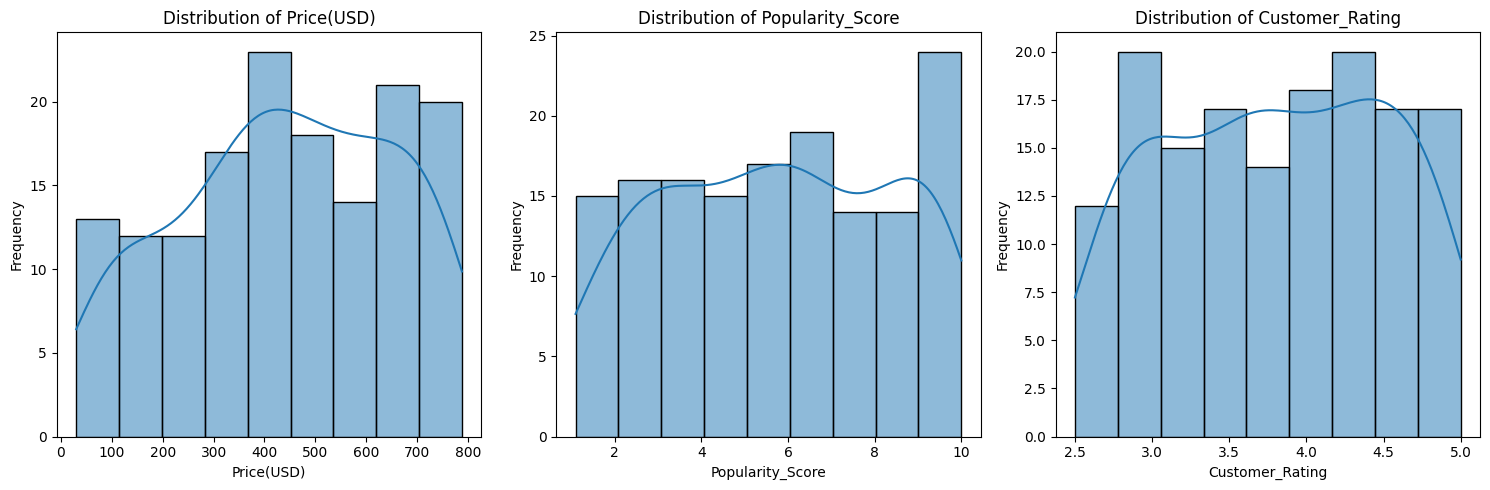

In [7]:
numerical_cols = ['Price(USD)', 'Popularity_Score', 'Customer_Rating']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(df_csv[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-273332015.py:2: SyntaxWarning: invalid escape sequence '\d'
  season_price['Year'] = season_price['Season'].str.extract('(\d{4})').astype(int)


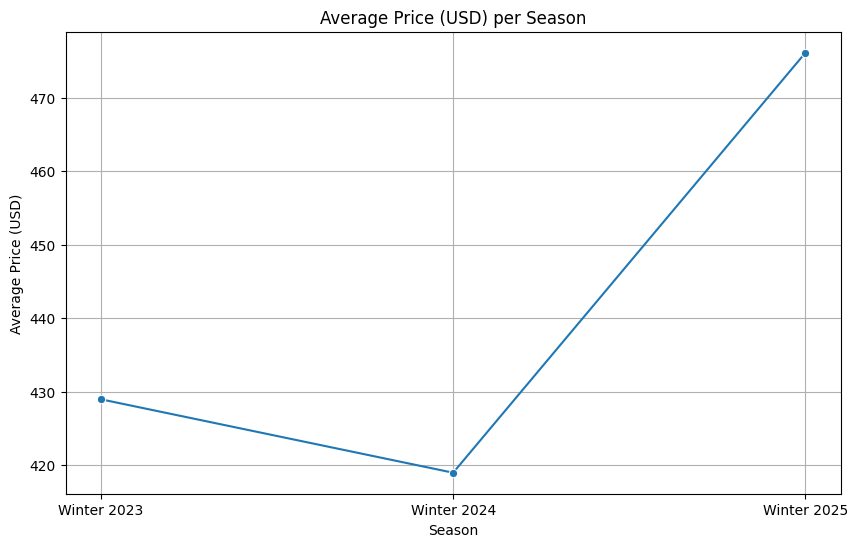

In [8]:
season_price = df_csv.groupby('Season')['Price(USD)'].mean().reset_index()
season_price['Year'] = season_price['Season'].str.extract('(\d{4})').astype(int)
season_price_sorted = season_price.sort_values('Year')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Season', y='Price(USD)', data=season_price_sorted, marker='o')
plt.title('Average Price (USD) per Season')
plt.xlabel('Season')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()

/tmp/ipython-input-3807508849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Price(USD)', data=season_price_sorted, palette='viridis')


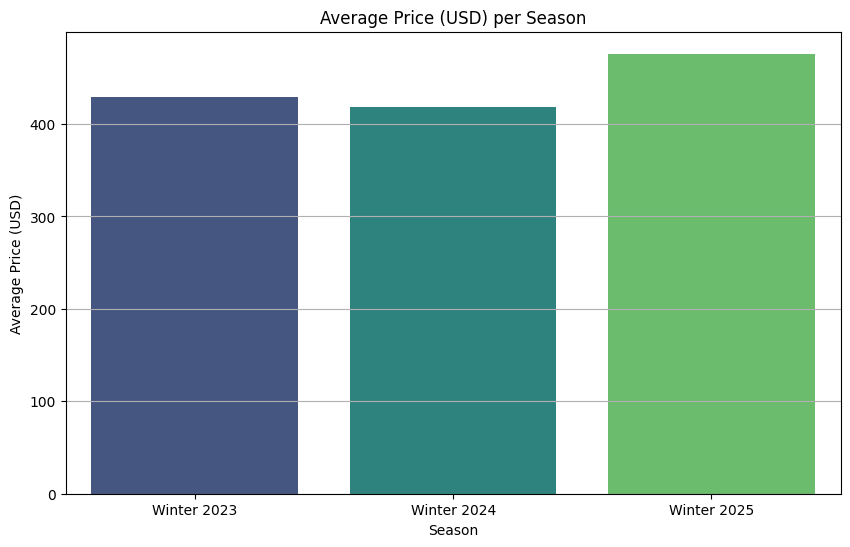

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Price(USD)', data=season_price_sorted, palette='viridis')
plt.title('Average Price (USD) per Season')
plt.xlabel('Season')
plt.ylabel('Average Price (USD)')
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-141535921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Price(USD)', data=df_csv, palette='coolwarm')


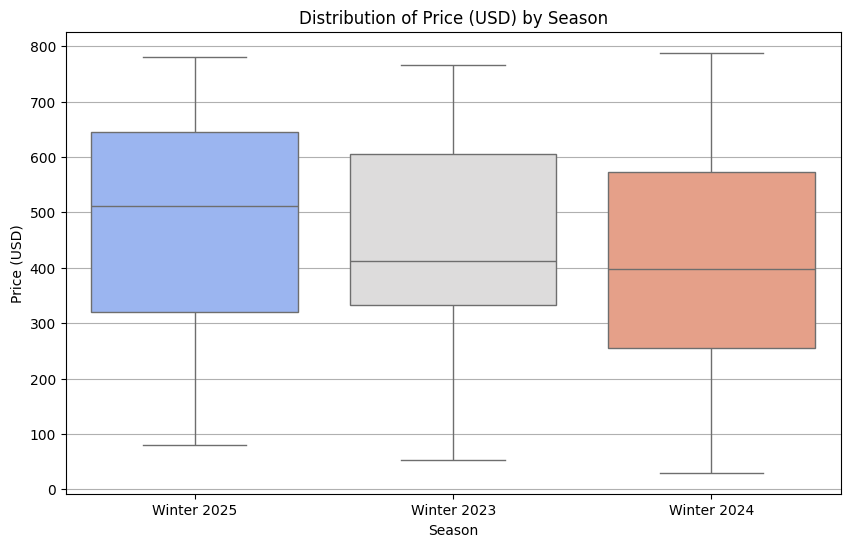

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Price(USD)', data=df_csv, palette='coolwarm')
plt.title('Distribution of Price (USD) by Season')
plt.xlabel('Season')
plt.ylabel('Price (USD)')
plt.grid(axis='y')
plt.show()

In [12]:
pivot_table = df_csv.pivot_table(values='Price(USD)', index='Season', columns='Category', aggfunc='mean')
print(pivot_table)

Category      Beanie       Boots  Cardigan        Coat     Gloves      Hoodie  \
Season                                                                          
Winter 2023  411.900  378.440000  426.3700  639.293333  403.63000  632.490000   
Winter 2024  350.615  385.943333  422.7125  468.502857  329.43375  459.385000   
Winter 2025  500.102  470.428333  567.8350  471.572500  441.73400  518.928333   

Category       Jacket       Scarf     Sweater     Thermal  
Season                                                     
Winter 2023  344.6080  483.178750  412.720000  360.815714  
Winter 2024  424.1560  451.868750  402.582857  482.487500  
Winter 2025  635.2825  360.682857  502.508571  409.615000  
